# Welcome to my Portfolio Project on WebScraping!

## In this project, I am going to analyze the Top 100 Covered Albums of All-Time. This project is definitely more personal to me as opposed to my other exercises. As an Amateur Musician, not only do I have a passion for music, but I most definitely love discovering covers of Songs/Albums where the artist provides his/her own twist to the original.

In [2]:
#Make the necessary imports immediately to avoid errors.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests 
from bs4 import BeautifulSoup 

In [3]:
#Here we are making an HTTP request to pull the HTML code from the URL we desire.

URL = "https://secondhandsongs.com/statistics?sort=covers&list=stats_release_covers"
r = requests.get(URL) 

In [20]:
soup = BeautifulSoup(r.content, "html5lib") 
print (soup.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Database Statistics |  SecondHandSongs
  </title>
  <meta content="Find out who performed the original version of a particular song, or who covered or sampled that song. Unlike many related
                      sites, we try to be as complete as possible (not just performer and song title, but also songwriters and original releases) and order the data in a reusable and maintainable way." name="description"/>
  <meta content="Covers, Cover Songs, Samples, Tributes, Music" name="keywords"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/art/apple-touch-icon-precomposed.png" rel="apple-touch-icon-precomposed"/>
  <link href="/art/apple-touch-icon-72x72-precomposed.png" rel="apple-touch-icon-precomposed" sizes="72x72"/>
  <link href="/art/apple-touch-icon-76x76-precomposed.png" rel="apple-touch-icon-precomposed" sizes="76x76"/>
  <link href="/art/apple-touch-icon-1

In [5]:
#We would like to extract the <tr> tags belonging to the table, whose id = "vw"
rows = soup.select('#vw tr')
rows

[<tr><th class="field-index "></th>
  <th class="field-release ">Release</th>
  <th class="field-performer ">Performer</th>
  <th class="field-covers text-right">Covers <i class="fa fa-caret-down fa- "></i></th>
  </tr>, <tr>
    <td class="field-index ">1</td>
    <td class="field-release "><a class="link-release" href="/release/712">The Beatles [White Album]</a></td>
    <td class="field-performer "><a class="link-performer" href="/artist/41">The Beatles</a></td>
    <td class="field-covers text-right">1634</td>
   </tr>, <tr>
    <td class="field-index ">2</td>
    <td class="field-release "><a class="link-release" href="/release/156">Rubber Soul</a></td>
    <td class="field-performer "><a class="link-performer" href="/artist/41">The Beatles</a></td>
    <td class="field-covers text-right">1497</td>
   </tr>, <tr>
    <td class="field-index ">3</td>
    <td class="field-release "><a class="link-release" href="/release/1095">Revolver</a></td>
    <td class="field-performer "><a clas

In [6]:
frame = []
for row in rows:
    frame.append([td.text for td in row.select('td')])
    print([td.text for td in row.select('td')])

[]
['1', 'The Beatles [White Album]', 'The Beatles', '1634']
['2', 'Rubber Soul', 'The Beatles', '1497']
['3', 'Revolver', 'The Beatles', '1489']
['4', 'Abbey Road', 'The Beatles', '1468']
['5', 'Meet Me in St. Louis', 'Judy Garland with Georgie Stoll and His Orchestra', '1399']
['6', 'Silent Night, Hallowed Night', 'Haydn Quartet', '1378']
['7', 'The Christmas Song (Merry Christmas to You)', 'The King Cole Trio with String Choir', '1195']
['8', "Sgt. Pepper's Lonely Hearts Club Band", 'The Beatles', '1107']
['9', 'Help!', 'The Beatles', '1081']
['10', 'Were You Fooling', 'Richard Himber & His Orchestra', '996']
['11', 'Jingle Bells', 'Edison Male Quartette', '985']
['12', 'Body and Soul', 'Ambrose and His Orchestra', '955']
['13', 'God Rest Ye Merry, Gentlemen', 'Meister Glee Singers', '901']
['14', "A Hard Day's Night", 'The Beatles', '891']
['15', 'The First Nowell', 'Tally-Ho!', '839']
['16', "I'll Be Home for Christmas (If Only in My Dreams)", 'Bing Crosby with John Scott Trotter 

## Another way we could've approached this scenario would be to use Pandas, which may have been easier. However, I'd prefer to use BeautifulSoup for purposes of this example.

In [7]:
#table = pd.read_html('https://secondhandsongs.com/statistics?sort=covers&list=stats_release_covers')[0]
#print(table)

In [8]:
df = pd.DataFrame(frame)
df.columns = ['Rank', 'Album', 'Artist', 'Count']
df.reset_index()
df.drop(0, inplace=True)
#Remove the zero index. Now everything is ranked 1-100

In [9]:
df.tail(20)

,Rank,Album,Artist,Count
81,81,When You Wish Upon a Star - I've Got No Strings,Cliff Edwards with Victor Young and His Orches...,398
82,82,The Wall,Pink Floyd,398
83,83,You'd Be So Nice to Come Home To,Dick Jurgens and His Orchestra,394
84,84,What the World Needs Now - Stan Getz Plays Bac...,Stan Getz,391
85,85,New Britain,The Original Sacred Harp Choir,387
86,86,The Bootleg Series Volumes 1-3,Bob Dylan,386
87,87,God Bless the Child,Billie Holiday,385
88,88,Don't Blame Me,Sarah Vaughan with George Treadwell's Orchestra,381
89,89,The Joshua Tree,U2,379
90,90,Comme d'habitude,Claude François,379


In [10]:
#Create a copy of our DataFrame for some Data Visualization.
df1 = df[0:9]
df1 = df1.astype({'Count':int,'Rank':int}) #Converting the columns to be numeric, in order to be used for Plotting.

## We will use the Seaborn library (my favorite for Data Visualization), to create a graph to analyze the data more easily. This graph represents the top 10 covered Albums and their respective counts. We can clearly tell that for some reason, 6 of the 10 most covered records belong to The Beatles! 

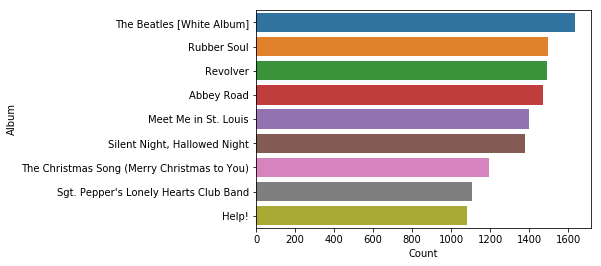

In [11]:
sns.barplot(x= "Count",y="Album",data=df1)

In [12]:
df['Count'] = df['Count'].astype(int)

In [13]:
df['Count'].sum()

58925

In [14]:
#The total Count of covers belonging to a Beatles Album:
Beatle = df.loc[df['Artist'] == 'The Beatles', 'Count'].sum()
Beatle

9977

In [15]:
#The total Count of covers not belonging to a Beatles Album:
Not_beatle = Beatle = df.loc[df['Artist'] != 'The Beatles', 'Count'].sum()
Not_beatle

48948

In [16]:
labels = ['Beatles', 'Non-Beatles']
sizes = [9977,48948]
colors = ['gold', 'yellowgreen']
explode = [0.1, 0]

## Using a simple Pie chart, we can see that the Beatles hold roughly 1/6 of the total number of Covers, in addition to holding the top 4 ranks. People clearly love this band!

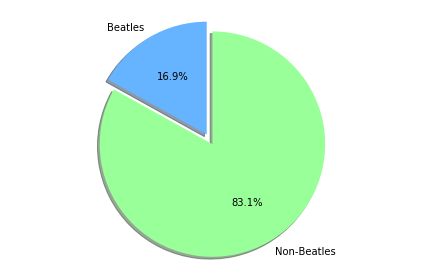

In [17]:
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors = ['#66b3ff', '#99ff99'],
        shadow=True, startangle=90)
plt.tight_layout()
plt.axis('equal')  
plt.show()

# This is the end of this project. We've conducted WebScraping & Data Manipulation/Visualization using various Python modules (BeautifulSoup, Numpy, Pandas, and Seaborn). Thanks for stopping by and please feel free to visit my Data Science blog: helloworldofdata.webnode.com